# Car Auction Data Analysis Project

# Section 1: Loading and cleaning the CSV Data File

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
# Custom KMeans class has been created, and can now be used for clustering
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
from kmeans import CustomKMeans, plot_clusters

# Import the cleaned data for use in the project
cleaned_data_path = os.path.abspath(os.path.join('..', 'data', 'cleaned', 'car_prices_cleaned.csv'))
car_df = pd.read_csv(cleaned_data_path)
car_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-14
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014-12-18


In [36]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472336 entries, 0 to 472335
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 57.7+ MB
None


## Initial Exploratory Questions

#### We each came up with a few exploratory questions in order to get a better idea of what the data is like that we are working with

In [23]:
#What is the average selling price?
price_avg = car_df['sellingprice'].mean()
print(f"The average selling price is: {price_avg:.2f}")


The average selling price is: 13690.40


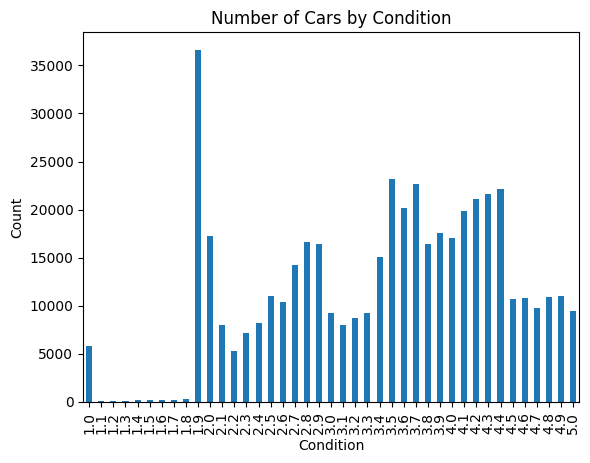

In [24]:
# Get the value counts of 'condition' and sort by ascending order
condition_counts = car_df['condition'].value_counts().sort_index()

# Plot the sorted data
condition_counts.plot(kind='bar', title='Number of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

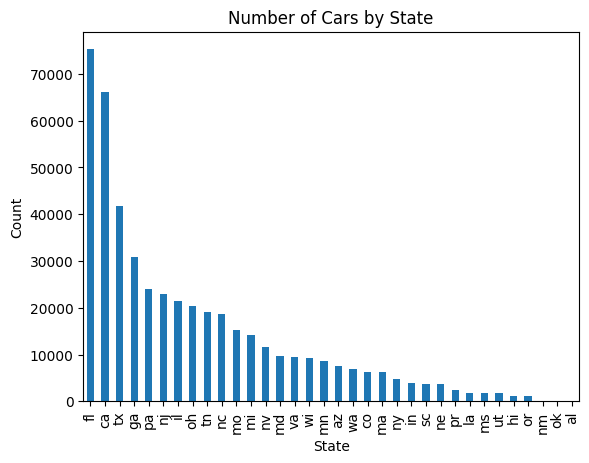

In [25]:
# What is the number of cars in each state?
car_df['state'].value_counts().plot(kind='bar', title='Number of Cars by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

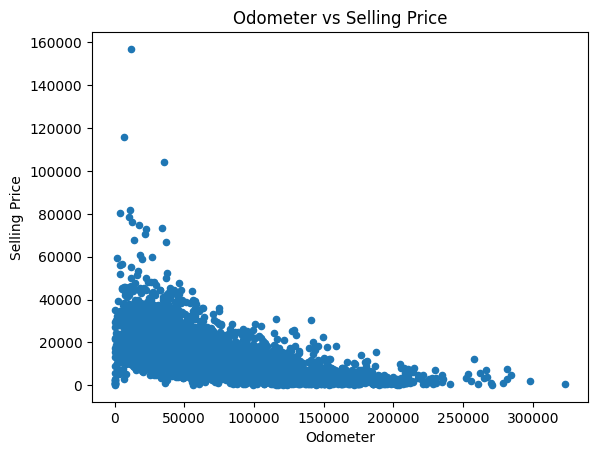

In [26]:
# What is the correlation between odometer and the selling price
car_df_sampled = car_df[car_df['odometer'] < 500000].sample(5000, random_state=50)
# Due to the dataset having about 500,000 rows the plot was too large, so a smaller sample size was used to increase readability
car_df_sampled.plot.scatter(x='odometer', y = 'sellingprice', title = 'Odometer vs Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

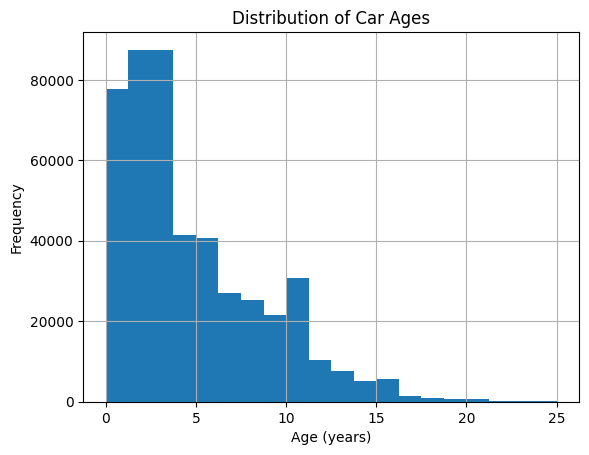

In [27]:
# What is the distribution of car ages? 
car_df['car_age'] = 2015 - car_df['year']
car_df['car_age'].hist(bins = 20)
plt.title('Distribution of Car Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

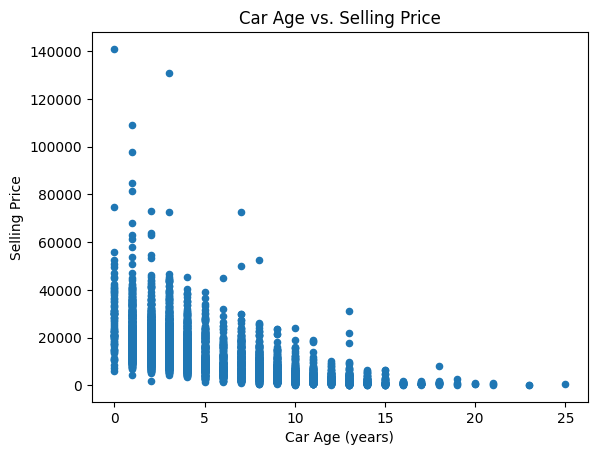

In [28]:
# What is the relationship between car age and selling price?
car_df_sampled = car_df.sample(5000, random_state= 50)
car_df_sampled.plot.scatter(x = 'car_age', y = 'sellingprice', title = 'Car Age vs. Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

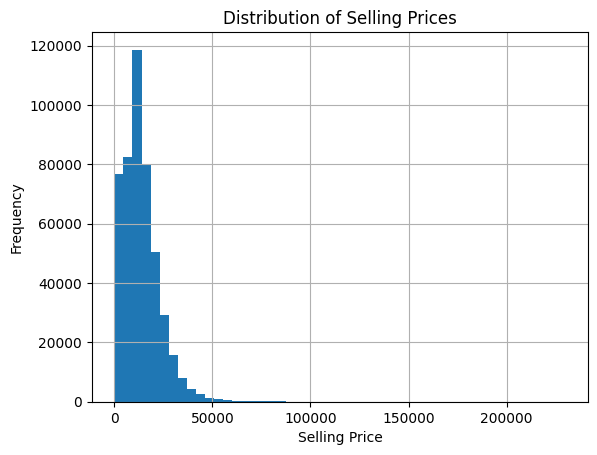

In [29]:
# What is the average mileage by make?
car_df['sellingprice'].hist(bins = 50)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


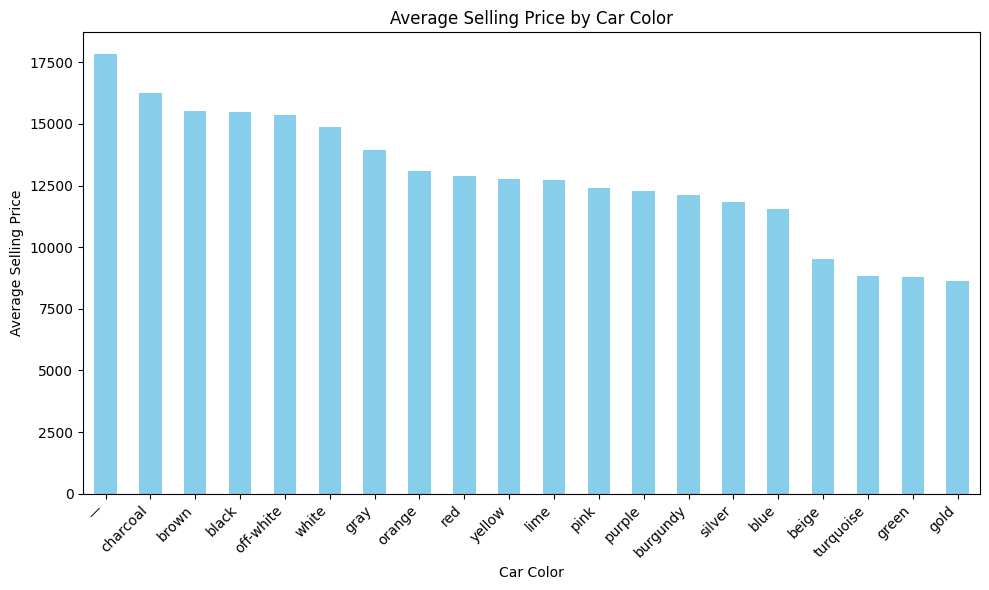

In [30]:
color_price = car_df.groupby('color')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
color_price.plot(kind='bar', color='skyblue', width = 0.5)
plt.title('Average Selling Price by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

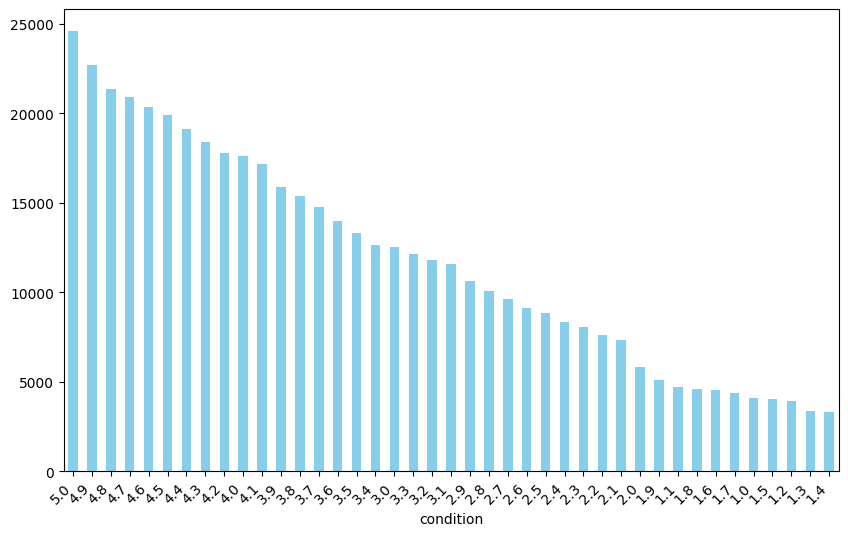

In [31]:
#Does the condition of the car determine the selling price? 
condition_price = car_df.groupby('condition')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
condition_price.plot(kind = 'bar', color = 'skyblue', width = 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

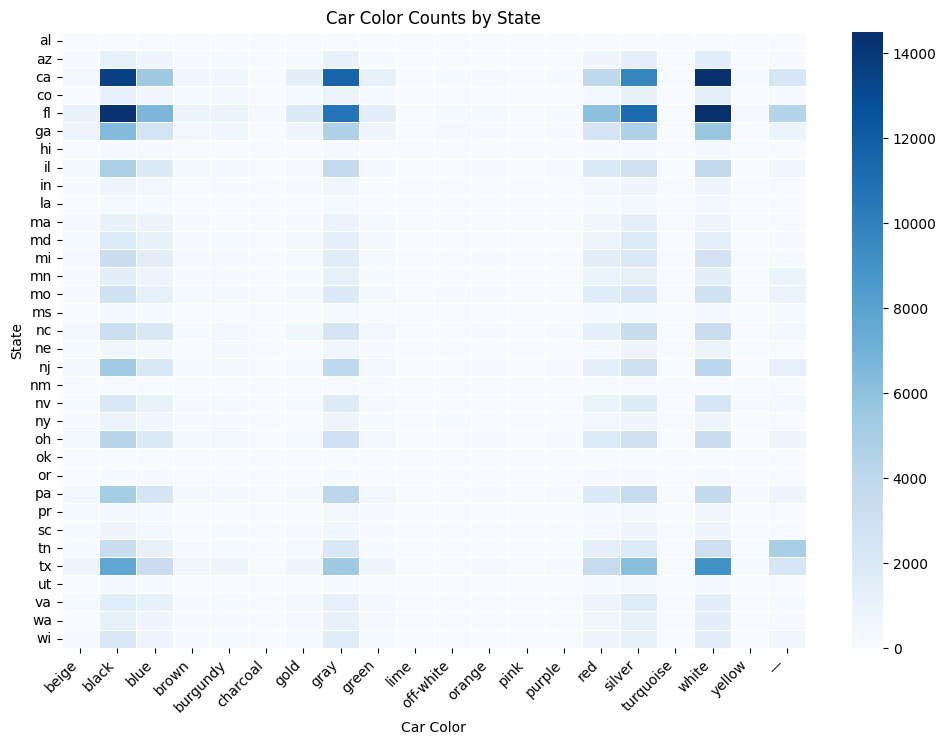

In [32]:
#Do states prefer a certain color? 

#heat map of the percentage of colors instead
state_color_counts = car_df.groupby(['state', 'color']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(state_color_counts, cmap='Blues', annot=False, linewidths=0.5)

plt.title('Car Color Counts by State')
plt.xlabel('Car Color')
plt.xticks(rotation=45, ha='right')
plt.ylabel('State')

plt.show()

#### Extra, potentially useful points of data

In [38]:
#What month sells the most cars? 
car_df['month'] = pd.to_datetime(car_df['saledate']).dt.month

most_sales_month = car_df['month'].value_counts().idxmax()
print("the state with the most sales is: ")
print(most_sales_month)
#this needs to be converted to string

#What state has the highest mileage cars sold on average?
highest_mileage_state = car_df.groupby('state')['odometer'].mean().idxmax()
print("the state with the highest mileage cars sold is: ")
print(highest_mileage_state)
#What year car is most common?
most_common_year = car_df['year'].value_counts().idxmax()
print("the most common year is: ")
print(most_common_year)
#What make sells best overall?
best_selling_make = car_df['make'].value_counts().idxmax()
print("the best selling make is: ")
print(best_selling_make)

#What seller makes up the most sales?
top_seller = car_df['seller'].value_counts().idxmax()
print("the top seller is: ")
print(top_seller)

#What is the average condition of the cars? 
average_condition = car_df['condition'].mean()
print("the average condition is: ")
print(average_condition)

# Which states have the highest selling price?
avg_price_by_state = car_df.groupby('state')['sellingprice'].mean().sort_values(ascending = False)
print("Average selling price by state type: ")
print(avg_price_by_state)

# What is the median selling price of cars by state?
median_price_by_state = car_df.groupby('state')['sellingprice'].median().sort_values(ascending= False)
print("Median selling price per state:")
print(median_price_by_state)

# What are the top 5 most common colors?
color_counts = car_df['color'].value_counts().head(5)
print("The top 5 most popular colors are:")
print(color_counts)

# How does the condition affect price?
avg_price_by_condition = car_df.groupby('condition')['sellingprice'].mean()
print('Average selling price by condition:')
print(avg_price_by_condition)

# How many cars are sold each month?
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')

car_df['sale_month'] = car_df['saledate'].dt.month
cars_per_month = car_df['sale_month'].value_counts().sort_index()
print("Number of cars sold each month:")
print(cars_per_month)

# What is the average selling price per car model?
price_avg_by_model = car_df.groupby('model')['sellingprice'].mean().sort_values(ascending=False)
print("The average selling price per car model: ")
print(price_avg_by_model.head(10))

# What are the top 10 most expesnive selling cars?
highest_sellers = car_df.nlargest(10, 'sellingprice')
print(highest_sellers[['make','model', 'sellingprice']])
# Most of these vehicle models make sense, however the ford escape being the highest price does not.


# It can be useful to see the percentage of vehicles that have an automatic transmission
transmission_percent = (car_df['transmission'] == 'automatic').mean()*100
print(f"The percentage of automatic transmission cars is %{transmission_percent:.2f}")
# This can be useful to determine if the non-automatic cars tend to be more or less expensive.

# How many cars have been sold in each year?


cars_per_year = car_df['saledate'].dt.year.value_counts()
print(f"The amount of cars sold in each year is: \n{cars_per_year}")
# Overall a lot more cars were sold in 2015 than 2014

# What is the average price for each car make?
price_avg_by_make = car_df.groupby('make')['sellingprice'].mean()
print("The average selling price for each make is: \n")
for make, price in price_avg_by_make.items():
    print(f"{make}: ${price:,.2f}")
# Rolls-Royce comes out as the most expensive selling make

# What percent of cars were sold in good condition?
good_condition_percent = (car_df['condition'] > 3.0).mean() * 100
print(f"The percent of cars sold in a good condition (> 3.0) is: %{good_condition_percent:.2f}")

# How many cars in the dataset have high mileage (>100,000)?
high_mileage_cars = (car_df['odometer'] > 100000).sum()
print(f"The amount of high mileage cars (miles > 100,000) in the set is: {high_mileage_cars}")


the state with the most sales is: 
2
the state with the highest mileage cars sold is: 
ok
the most common year is: 
2013
the best selling make is: 
Ford
the top seller is: 
ford motor credit company,llc
the average condition is: 
3.4265759967480776
Average selling price by state type: 
state
tn    17285.152896
co    15745.498405
nv    15576.319380
il    15402.065854
mi    15182.068946
ca    14895.258650
mo    14694.777771
oh    14459.130975
fl    14331.417953
wa    14327.867798
mn    14313.545844
wi    14105.263810
pa    14007.944769
nj    13621.127896
tx    13574.509302
ne    13242.496608
ga    12840.065257
ny    12589.252685
ut    12491.601981
hi    12366.514523
az    12168.611403
or    11959.574976
ms    11502.419075
la    11159.715023
in    10959.654550
sc    10747.556473
pr     9755.170993
al     9440.000000
nc     8696.677967
va     8416.433651
md     7713.430892
ok     7448.148148
ma     6787.895249
nm     6479.754601
Name: sellingprice, dtype: float64
Median selling price per s

Running CustomKMeans for k=1
converged at iteration 2


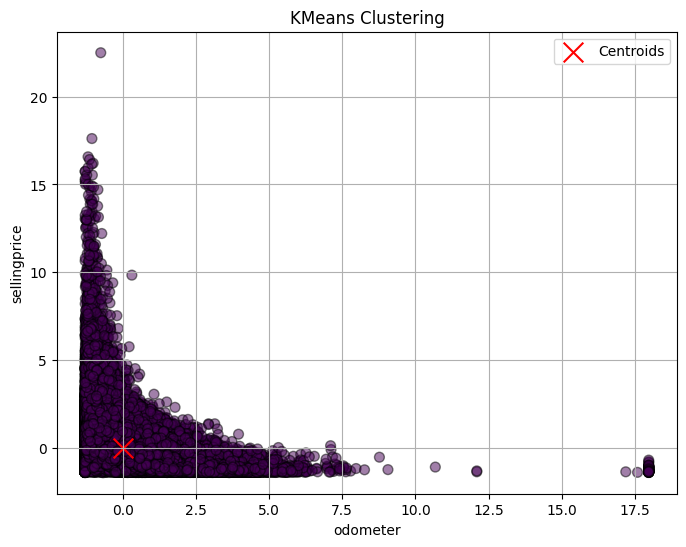

Inertia for k=1: 3306351.9999999986

Running CustomKMeans for k=2
converged at iteration 16


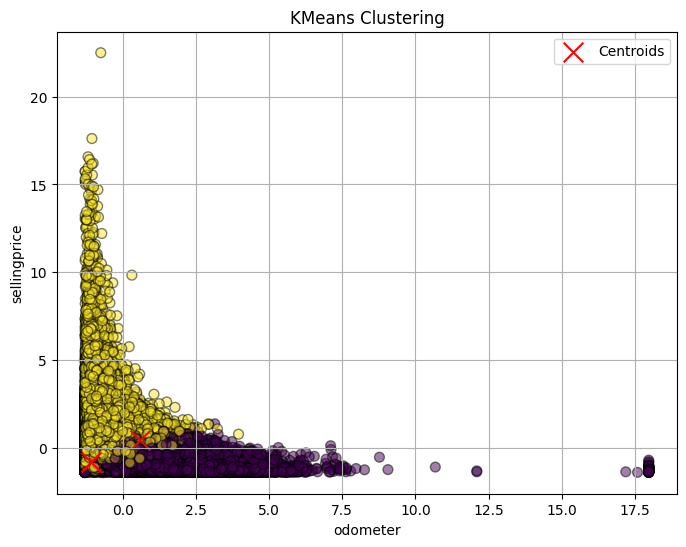

Inertia for k=2: 2199292.479156082

Running CustomKMeans for k=3
converged at iteration 15


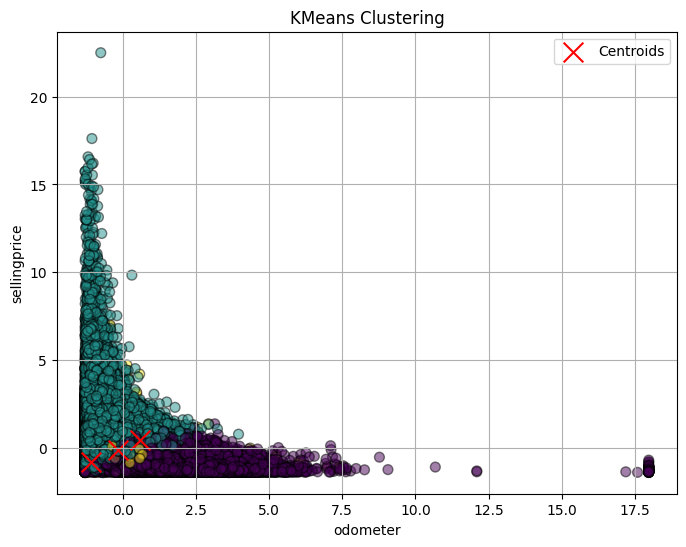

Inertia for k=3: 1685110.9452835303

Running CustomKMeans for k=4
converged at iteration 15


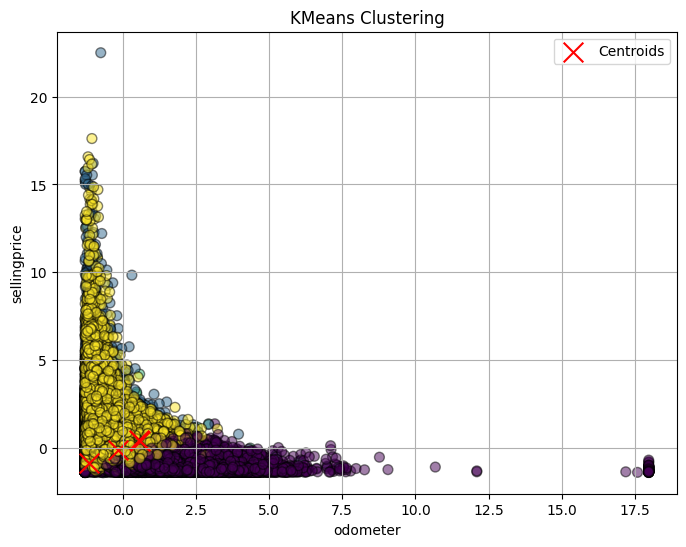

Inertia for k=4: 1467869.991977646

Running CustomKMeans for k=5
converged at iteration 53


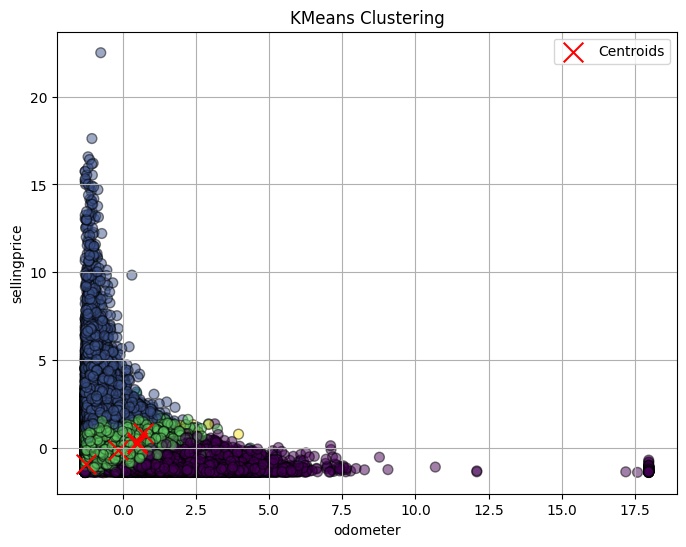

Inertia for k=5: 1191929.3888912885



In [39]:
# The clustering can now be carried out using the imported KMeans class
# Clustering can only work using numeric data, therefore only numeric data must be selected
from sklearn.preprocessing import StandardScaler
df = car_df.select_dtypes(include=[np.number])

#When running the data without scaling the values, the centroids are in the same spot with huge inertia values
#Using the standard scaler from sklearn can help the data be more readable
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# The following code uses the CustomKmMeans class in order to create a clustering of odometer and sellingprice
for k in range(1,6):
    print(f"Running CustomKMeans for k={k}")
    kmeans_custom = CustomKMeans(k=k, max_iters=100, tol=1e-4, random_state=42)
    kmeans_custom.fit(df)
    labels = kmeans_custom.predict(df)
    plot_clusters(df, labels, kmeans_custom.centroids, 'odometer', 'sellingprice')
    print(f"Inertia for k={k}: {kmeans_custom.inertia_}\n")



In [3]:
# Further Exploration Questions Part 2
fordpickup = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'ford_pickup.csv'))
camry = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'toyota_camry.csv'))
altima = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'nissan_altima.csv'))

onefifty_df = pd.read_csv(fordpickup)
camry_df = pd.read_csv(camry)
altima_df = pd.read_csv(altima)

print(onefifty_df.info())
print(altima_df.info())
print(camry_df.info())


# What is the count of cars by body type

body_counts = car_df['body'].value_counts()
# body_counts = sorted(body_counts, key=lambda x: x[1], reverse= True)
# body_counts = body_counts[:len(body_counts-10)]
plt.figure(figsize=(10,6))
body_counts.plot(kind ='bar', color ='blue')
plt.title('Number of Cars by Body Type')
plt.xticks( rotation = 45, ha = 'right', fontsize = 7)
plt.xlabel('Body Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# What is the average selling price by body type?
avg_price_by_body = car_df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_price_by_body.plot(kind = 'bar', color = 'blue')
plt.title('Average selling price by body type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.xticks( rotation = 45, ha = 'right', fontsize = 7)
plt.tight_layout()
plt.show()

# What is the count of each car by transmission?

transmission_counts = car_df['transmission'].value_counts()
plt.figure(figsize=(6,4))
transmission_counts.plot(kind='bar', color='blue')
plt.title('Number of Cars by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

# What is the average selling price by transmission type?
avg_price_by_transmission = car_df.groupby('transmission')['sellingprice'].mean()
plt.figure()
avg_price_by_transmission.plot(kind='bar', color ='blue')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.show()

# Is there a correlation betwen car age and condition?
plt.figure()
plt.scatter(car_df['car_age'], car_df['condition'], alpha = .6)
plt.title('Car Age vs. Condition')
plt.xlabel('Car Age')
plt.ylabel('Condition')
plt.show()

# Nah there definitely is

# What is the distribution of odometer readings?
# Why is x axis coming out like this?
plt.figure(figsize=(8,7))
car_df['odometer'].hist(bins=50)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# How does the selling price vary across the top 10 car makes?
top_10 = car_df['make'].value_counts().head(10).index
plt.figure(figsize=(8,6))
sns.boxplot( x ='make', y = 'sellingprice', data = car_df[car_df['make'].isin(top_10)])
plt.title('Selling price by make')
plt.xlabel('Make')
plt.ylabel('Selling price')
plt.xticks(rotation = 45)
plt.show()

# Does the state affect the average condition of the cars sold?

plt.figure(figsize=(12,6))
avg_cond_per_state = car_df.groupby('state')['condition'].mean().sort_values(ascending=False)
avg_cond_per_state.plot(kind='bar', color = 'green')
plt.title('Average Car Condition by State')
plt.xlabel('State')
plt.ylabel('Average Condition of Car')
plt.xticks(rotation = 360)
plt.show()

# Does the interior affect the selling price?
avg_price_by_interior = car_df.groupby('interior')['sellingprice'].mean().sort_values(ascending= False)
plt.figure(figsize=(12, 8))
avg_price_by_interior.plot(kind = 'bar', color = 'purple')
plt.title('Average Selling Price by Interior Color')
plt.xlabel('Interior coloring')
plt.ylabel('Average Selling Price')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

# How has the selling price changed over time?

car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors = 'coerce')
car_df['sale_month_year'] = car_df['saledate'].dt.to_period('M')
avg_price_over_time = car_df.groupby('sale_month_year')['sellingprice'].mean()

plt.figure(figsize= (12,8))
avg_price_over_time.plot()
plt.title('average Selling price over time')
plt.xlabel('Sale Month')
plt.ylabel('Average Selling Price')
plt.xticks( rotation = 0)
plt.tight_layout()
plt.show()

# Is there a relationshiip between odometer reading and car condition?
# Why doesn't odometer show as actual miles?
plt.figure(figsize=(12,8))
plt.scatter(car_df['odometer'], car_df['condition'], alpha= .6)
plt.title('Odometer Reading compared to Condition')
plt.xlabel('Odometer')
plt.ylabel('Condition')
plt.show()

# What is the average selling price by car age?

avg_price_by_age = car_df.groupby('car_age')['sellingprice'].mean()
plt.figure(figsize=(12,8))
avg_price_by_age.plot(kind = 'bar', color = 'pink')
plt.title('Average Selling price by Car age')
plt.xlabel(' Car Age')
plt.ylabel('Average Selling price')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Is there a relationship between mmr and selling price?
# I would assume so
car_df_sampled = car_df.sample(5000, random_state=50)

plt.figure(figsize=(8,6))
plt.scatter(car_df_sampled['mmr'], car_df_sampled['sellingprice'], alpha=0.5)
plt.plot([car_df_sampled['mmr'].min(), car_df_sampled['mmr'].max()],
         [car_df_sampled['mmr'].min(), car_df_sampled['mmr'].max()], color='red')
plt.title('MMR Compared to Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

# How is the selling price different from mmr?
# selling price - mmr
car_df['price_difference'] = car_df['sellingprice'] - car_df['mmr']
plt.figure(figsize=(8,6))
car_df['price_difference'].hist(bins=10)
plt.title('Distribution of Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Which cars are most sold by model?
top_10_models = car_df['model'].value_counts().head(10)

plt.figure(figsize=(12,9))
top_10_models.plot(kind='bar', color='pink')
plt.title('Top 10 Sold Car Models')
plt.xlabel('Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Does the color (exterior) of the car affect the price?
# only comparing top 10 colors

top_10_colors = car_df['color'].value_counts().head(10).index
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'color', y = 'sellingprice', data = car_df[car_df['color'].isin(top_10_colors)])
plt.title('selling price by color')
plt.xlabel('Color')
plt.ylabel('Selling Price')
plt.xticks(rotation = 45)
plt.show()

# What is the spread of selling prices for cars in great condition?
# great condition meaning above 4

great_condition_cars = car_df[car_df['condition'] >= 4]
plt.figure(figsize=(12,8))
great_condition_cars['sellingprice'].hist(bins=50)
plt.title('Distribution of Selling Prices for Cars in great Condition')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.show()

# Can we draw any correlations between the current numerical data?
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'car_age']
corr_matrix = car_df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/Users/patrick/Documents/Car Auction Project Files/Car-Auction-Data-Analysis-Project/data/raw/google_trends/ford_pickup.csv'

## Introduction of Google Trends Data: Searching for patterns

### First I wanted to build on previous research questions I had to see if we can find patterns into the popularity index of a car to the sales of said car

In [ ]:
#Here we check the best selling cars
car_df['make_model'] = car_df['make'] + ' ' + car_df['model']

overall_sales = car_df.groupby('make_model').size().reset_index(name='total_sales')

best_selling_cars = overall_sales.sort_values(by='total_sales', ascending=False)

print("Best Selling Cars Overall:")
print(best_selling_cars)




### Here I look at the top three best sellers because I thought it was odd that Altima and F-150 dominated, so in the next few blocks I removed some dominant Dealerships to see if there is much of a change

In [ ]:
car_df['saledate'] = pd.to_datetime(car_df['saledate'])

#Extract the month and year from 'saledate'
car_df['month'] = car_df['saledate'].dt.to_period('M')

#Create a new colummn for the make-model combination
car_df['make_model'] = car_df['make'] + ' ' + car_df['model']

#Group by month and make_model, then count the number of sales
monthly_sales = car_df.groupby(['month', 'make_model']).size().reset_index(name='sales')

#Get the top 3 selling cars for each month WITHOUT! resetting the index
top_3_sales = monthly_sales.groupby('month').apply(lambda x: x.nlargest(3, 'sales'))
print(top_3_sales)



top_3_sales_copy = top_3_sales.copy()
# I did not want to reset the index for everything moving forward so I created a copy
top_3_sales_copy_reset = top_3_sales_copy.reset_index(drop=True)

print("Top 3 Sales DataFrame after resetting index:\n", top_3_sales_copy_reset.head())

plot_data = top_3_sales_copy_reset

plt.figure(figsize=(14, 7))

for month in plot_data['month'].unique():
    month_data = plot_data[plot_data['month'] == month]
    plt.bar(month_data['month'].astype(str), month_data['sales'], label=month_data['make_model'].values)


plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Top 3 Best-Selling Make-Models per Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # This Placess the legend outside the plot
plt.show()


#This is pretty much the same code but I removed two large influences and got the same results
car_df_filtered_copy = car_df.copy()
sellers_to_drop = ["ford motor credit company,llc", "nissan-infiniti lt"]
car_df_filtered = car_df_filtered_copy[~car_df_filtered_copy['seller'].isin(sellers_to_drop)]

#This Calculate total sales per seller
total_sales_per_seller = car_df_filtered.groupby('seller').size().reset_index(name='total_sales')
total_sales_per_seller = total_sales_per_seller.sort_values(by='total_sales', ascending=False)

print("Total Sales Per Seller:\n", total_sales_per_seller)

plt.figure(figsize=(10, 6))

#Loop through the top 3 for each month
for month in top_3_sales['month'].unique():
    month_data = top_3_sales[top_3_sales['month'] == month]
    plt.bar(month_data['month'].astype(str), month_data['sales'], label=month_data['make_model'].values)

plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Top 3 Best-Selling Make-Models per Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print("Total Sales Per Seller After Filtering:\n", total_sales_per_seller)


#F-150's still seem to be very dominant, lets see who sells the most to make sure we dont have a flaw in the data

f150_sales = car_df[car_df['model'] == 'F-150']

#Group by seller and count the number of F-150 sales
f150_sales_by_seller = f150_sales.groupby('seller').size().reset_index(name='total_sales')
f150_sales_by_seller = f150_sales_by_seller.sort_values(by='total_sales', ascending=False)

print("Total Ford F-150 Sales by Seller:")
print(f150_sales_by_seller)

#Hopefully now with this data we can analyze the google trends popularity index and find some patterns



### Re-Formatting the google trends data

In [ ]:
# Check the first few rows and columns of each DataFrame
print("Ford F-150 DataFrame:")
print(onefifty_df.head())
print(onefifty_df.columns)

print("\nToyota Camry DataFrame:")
print(camry_df.head())
print(camry_df.columns)

print("\nNissan Altima DataFrame:")
print(altima_df.head())
print(altima_df.columns)


# Reset the index to get the dates into a column
onefifty_df_reset = onefifty_df.reset_index()
camry_df_reset = camry_df.reset_index()
altima_df_reset = altima_df.reset_index()

# Rename the columns for easier access
onefifty_df_reset.columns = ['date', 'popularity']
camry_df_reset.columns = ['date', 'popularity']
altima_df_reset.columns = ['date', 'popularity']


# Reset the index for each DataFrame to make the 'Week' column accessible
onefifty_df_reset = onefifty_df.reset_index()
camry_df_reset = camry_df.reset_index()
altima_df_reset = altima_df.reset_index()

# The first column is the 'Week' column. Rename it to 'date' for clarity.
onefifty_df_reset.columns = ['date', 'popularity']
camry_df_reset.columns = ['date', 'popularity']
altima_df_reset.columns = ['date', 'popularity']

# Ensure that the 'date' column contains only the date information, and strip any leading/trailing whitespace
onefifty_df_reset['date'] = onefifty_df_reset['date'].str.replace('Week', '').str.strip()
camry_df_reset['date'] = camry_df_reset['date'].str.replace('Week', '').str.strip()
altima_df_reset['date'] = altima_df_reset['date'].str.replace('Week', '').str.strip()

# Convert the 'date' column to datetime format
onefifty_df_reset['date'] = pd.to_datetime(onefifty_df_reset['date'])
camry_df_reset['date'] = pd.to_datetime(camry_df_reset['date'])
altima_df_reset['date'] = pd.to_datetime(altima_df_reset['date'])

# Print the updated DataFrames to verify the changes
print("Ford F-150 DataFrame:\n", onefifty_df_reset.head())
print("Toyota Camry DataFrame:\n", camry_df_reset.head())
print("Nissan Altima DataFrame:\n", altima_df_reset.head())


#Data looks okay, we can move forward with plotting
plt.figure(figsize=(14, 7))

plt.plot(onefifty_df_reset['date'], onefifty_df_reset['popularity'], label='Ford F-150', color='blue')
plt.plot(camry_df_reset['date'], camry_df_reset['popularity'], label='Toyota Camry', color='orange')
plt.plot(altima_df_reset['date'], altima_df_reset['popularity'], label='Nissan Altima', color='green')

plt.title('Google Trends Popularity Score Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity Score')
plt.legend()
plt.grid()

plt.show()

##Need to figure out how to plot my altima sales data nicely